In [1]:
import socket
import strax
import straxen
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
import datetime
from multihist import Hist1d, Histdd
import time
import itertools
import os

from scipy import stats
from straxen import units
from scipy.optimize import curve_fit

import math
import cutax
from straxen.get_corrections import get_correction_from_cmt
from cutax.cuts import *

%load_ext autoreload
%autoreload 2
#import importlib
#importlib.reload(cutax)

import peaks_utility as psu
import drift_diffusion_utility as ddu
import s2widthcut_utility as wcu

In [2]:
straxen.print_versions()

module version                                               path   git
0   python  3.8.13  /opt/XENONnT/anaconda/envs/XENONnT_development...  None
1    strax   1.2.3  /opt/XENONnT/anaconda/envs/XENONnT_development...  None
2  straxen   1.8.3  /opt/XENONnT/anaconda/envs/XENONnT_development...  None
3    cutax  1.13.0  /dali/lgrandi/xenonnt/software/cutax/latest/cutax  None

In [3]:
#st = straxen.contexts.xenonnt_online()
st = cutax.contexts.xenonnt_online(cut_list=[cutax.cut_lists.basic.BasicCuts,cutax.cut_lists.kr83m.Kr83mSelection])

In [4]:
dsets = st.select_runs(run_mode='tpc_kr83m',available='event_info')

Checking data availability:   0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
dsets0 = dsets[(dsets.end > pd.to_datetime('08/01/2022')) & (dsets.end < pd.to_datetime('08/07/2022'))]
dsets1 = dsets[(dsets.end > pd.to_datetime('01/01/2022')) & (dsets.end < pd.to_datetime('06/17/2022'))]

In [6]:
kr_runs0 = dsets0.name.values[:]
kr_runs1 = dsets1.name.values[:]
print(len(kr_runs0), len(kr_runs1))

45 69


# SR0

In [46]:
dsets0 = dsets[(dsets.end > pd.to_datetime('06/04/2021')) & (dsets.end < pd.to_datetime('06/08/2021'))]
dsets1 = dsets[(dsets.end > pd.to_datetime('06/18/2021')) & (dsets.end < pd.to_datetime('06/22/2021'))]
dsets2 = dsets[(dsets.end > pd.to_datetime('06/29/2021')) & (dsets.end < pd.to_datetime('07/02/2021'))]
dsets3 = dsets[(dsets.end > pd.to_datetime('07/18/2021')) & (dsets.end < pd.to_datetime('07/21/2021'))]
dsets4 = dsets[(dsets.end > pd.to_datetime('08/02/2021')) & (dsets.end < pd.to_datetime('08/04/2021'))]
dsets5 = dsets[(dsets.end > pd.to_datetime('08/10/2021')) & (dsets.end < pd.to_datetime('08/12/2021'))]
dsets6 = dsets[(dsets.end > pd.to_datetime('08/24/2021')) & (dsets.end < pd.to_datetime('08/26/2021'))]
dsets7 = dsets[(dsets.end > pd.to_datetime('09/06/2021')) & (dsets.end < pd.to_datetime('09/08/2021'))]
dsets8 = dsets[(dsets.end > pd.to_datetime('09/20/2021')) & (dsets.end < pd.to_datetime('09/22/2021'))]
dsets9 = dsets[(dsets.end > pd.to_datetime('10/04/2021')) & (dsets.end < pd.to_datetime('10/06/2021'))]
dsets10 = dsets[(dsets.end > pd.to_datetime('10/18/2021')) & (dsets.end < pd.to_datetime('10/21/2021'))]
dsets11 = dsets[(dsets.end > pd.to_datetime('11/01/2021')) & (dsets.end < pd.to_datetime('11/03/2021'))]
dsets12 = dsets[(dsets.end > pd.to_datetime('11/10/2021')) & (dsets.end < pd.to_datetime('11/14/2021'))]
dsets13 = dsets[(dsets.end > pd.to_datetime('11/28/2021')) & (dsets.end < pd.to_datetime('12/01/2021'))]

In [47]:
krrun0 = dsets0.name.values[:]
krrun1 = dsets1.name.values[:]
krrun2 = dsets2.name.values[:]
krrun3 = dsets3.name.values[:]
krrun4 = dsets4.name.values[:]
krrun5 = dsets5.name.values[:]
krrun6 = dsets6.name.values[:]
krrun7 = dsets7.name.values[:]
krrun8 = dsets8.name.values[:]
krrun9 = dsets9.name.values[:]
krrun10 = dsets10.name.values[:]
krrun11 = dsets11.name.values[:]
krrun12 = dsets12.name.values[:]
krrun13 = dsets13.name.values[:]

In [ ]:
evKr0 = ddu.merge_runs_kr(st,kr_runs0)
evKr0.to_pickle(f'{ddir}/SR0_Kr83m_{krrun0_0[-1]}_{krrun0_0[0]}_EventInfoDouble.pkl')

2022-09-01 08:21:06.927513: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/XENONnT/anaconda/envs/XENONnT_development/lib64:/opt/XENONnT/anaconda/envs/XENONnT_development/lib:/opt/rh/devtoolset-9/root/usr/lib64:/opt/rh/devtoolset-9/root/usr/lib:/opt/rh/devtoolset-9/root/usr/lib64/dyninst:/opt/rh/devtoolset-9/root/usr/lib/dyninst:/opt/rh/devtoolset-9/root/usr/lib64:/opt/rh/devtoolset-9/root/usr/lib
2022-09-01 08:21:06.927557: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-01 08:21:16.367207: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/XENONnT/anaconda/envs

0
046611, livetime 3603.00 s, tot. events: 45715, Kr events: 24406, Kr-rate: 6.77 Hz
1
046608, livetime 3602.90 s, tot. events: 57856, Kr events: 35204, Kr-rate: 9.77 Hz
2
046605, livetime 3602.98 s, tot. events: 73241, Kr events: 49435, Kr-rate: 13.72 Hz
3
046602, livetime 3602.98 s, tot. events: 93983, Kr events: 69150, Kr-rate: 19.19 Hz
4
046599, livetime 3603.14 s, tot. events: 118701, Kr events: 92430, Kr-rate: 25.65 Hz
5
046596, livetime 3602.91 s, tot. events: 143509, Kr events: 115567, Kr-rate: 32.08 Hz
6
046593, livetime 2075.23 s, tot. events: 89302, Kr events: 72714, Kr-rate: 35.04 Hz
7
046590, livetime 3603.28 s, tot. events: 165482, Kr events: 136006, Kr-rate: 37.75 Hz
8
046587, livetime 3603.08 s, tot. events: 160430, Kr events: 131481, Kr-rate: 36.49 Hz
9
046584, livetime 3603.19 s, tot. events: 135078, Kr events: 107530, Kr-rate: 29.84 Hz
10
046581, livetime 3603.04 s, tot. events: 125231, Kr events: 98415, Kr-rate: 27.31 Hz
11
046578, livetime 3603.34 s, tot. events: 1

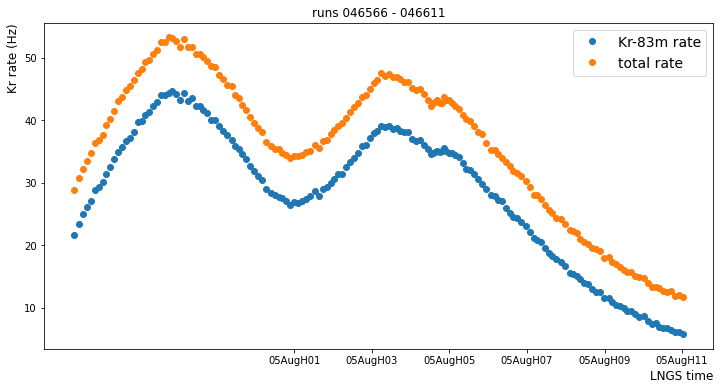

In [38]:
ddu.plot_kr_rate_vs_time(st,kr_runs0[26:42])

0
044399, livetime 1802.76 s, tot. events: 43133, Kr events: 31832, Kr-rate: 17.66 Hz
1
044396, livetime 1803.20 s, tot. events: 49317, Kr events: 37861, Kr-rate: 21.00 Hz
2
044393, livetime 1803.05 s, tot. events: 56808, Kr events: 44856, Kr-rate: 24.88 Hz
3
044390, livetime 1803.07 s, tot. events: 64963, Kr events: 52607, Kr-rate: 29.18 Hz
4
044387, livetime 1803.33 s, tot. events: 72846, Kr events: 60289, Kr-rate: 33.43 Hz
5
044384, livetime 1803.02 s, tot. events: 81462, Kr events: 68653, Kr-rate: 38.08 Hz
6
044381, livetime 1803.17 s, tot. events: 89629, Kr events: 76796, Kr-rate: 42.59 Hz
7
044378, livetime 1802.97 s, tot. events: 96172, Kr events: 82883, Kr-rate: 45.97 Hz
8
044375, livetime 1803.03 s, tot. events: 103120, Kr events: 89380, Kr-rate: 49.57 Hz
9
044372, livetime 1803.09 s, tot. events: 104637, Kr events: 90567, Kr-rate: 50.23 Hz
10
044369, livetime 1803.10 s, tot. events: 105718, Kr events: 92110, Kr-rate: 51.08 Hz
11
044366, livetime 383.12 s, tot. events: 23321, 

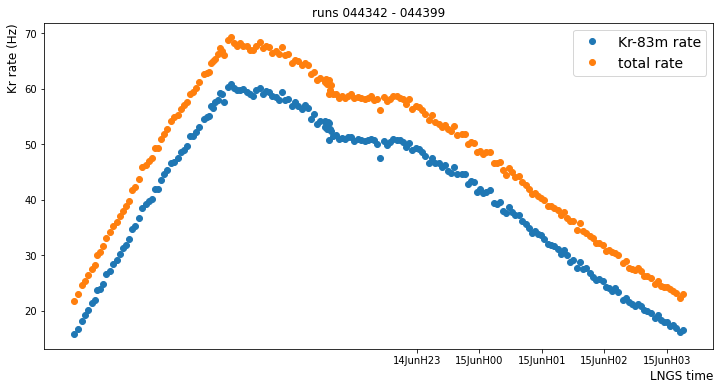

In [40]:
ddu.plot_kr_rate_vs_time(st,kr_runs1[45:65])

In [7]:
ddir = '/dali/lgrandi/dandrea/data'
#evKr0 = ddu.merge_runs_kr(st,kr_runs0[42:26])
#evKr0.to_pickle(f'{ddir}/SR1_dev_Kr83m_{kr_runs0[42]}_{kr_runs0[26]}_EventInfoDouble.pkl')
evKr0 = pd.read_pickle(f'{ddir}/SR1_dev_Kr83m_{kr_runs0[42]}_{kr_runs0[26]}_EventInfoDouble.pkl')

In [8]:
#evKr1 = ddu.merge_runs_double(st,kr_runs1[45:55])
#evKr1.to_pickle(f'{ddir}/SR1_dev_Kr83m_{kr_runs1[45]}_{kr_runs1[55]}_EventInfoDouble.pkl')
evKr1 = pd.read_pickle(f'{ddir}/SR1_dev_Kr83m_{kr_runs1[45]}_{kr_runs1[55]}_EventInfoDouble.pkl')

In [43]:
def diffusion_analysis_kr(ev, title = 'Kr83m', fit_range = (50,2000), far = True, plot = False ):
    #if(plot): ddu.plot_area_width_aft(ev, title)
    
    ######### Kr selection #########
    #KrSelection = st.get_single_plugin('030000', 'cut_Kr_SingleS1S2')
    #mask = KrSelection.cut_by(ev)
    mask = ddu.mask_KrSingleS1(ev)
    
    ######### Perpendicular Wires selection #########
    #FarWires = st.get_single_plugin('030000', 'cut_far_wires')
    #NearWires = st.get_single_plugin('030000', 'cut_near_wires')
    #maskFW = FarWires.cut_by(ev)
    #maskNW = NearWires.cut_by(ev)
    maskFW, maskNW = wcu.mask_S2Width_vs_pos_kr(ev)
    if far: evD = ev[mask & maskFW]
    else: evD = ev[mask & maskNW]
    #maskFV = ev['cut_fiducial_volume']
    #maskFV = ddu.mask_FV(ev)
    if(plot):
        ddu.plot_s2width_dt_kr(evD, title,width='90p',wlim = (0,30000))
        ddu.plot_s2width_dt_kr(evD, title,width='90p',tlim = (0,200), wlim = (0,7000))
    #    ddu.plot_area_width_aft_kr(evD, title)
    #    wcu.plot_r2z_xy(evD,title)
    vd, vd_err, cathodedt, gatedt, s2shift = ddu.drift_velocity_kr(evD,title,
                                                                   binning=2000,w=4,plot=plot)
    d, d_err, par, par_err = ddu.diffusion_constant_kr(evD,title,fit_range=fit_range,vd = vd,plot=plot)
    #return vd, vd_err, d, d_err, cathodedt, gatedt, s2shift, par, par_err
    par = (d* units.cm**2 / units.s,vd* units.mm / units.us,gatedt*units.us)
    return par

/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Drift velocity = 0.678 +/- 0.003 mm/us
Diffusion constant = 47.01 +/- 0.13 cm2/s, tGate = 19.70 us


/home/valerioda/xenon-notes/fast_response_analysis/drift_diffusion_utility.py:391: RuntimeWarning: invalid value encountered in sqrt
  return sigma_to_r50p * np.sqrt(2 * D * (t-tGate) / vd**2)


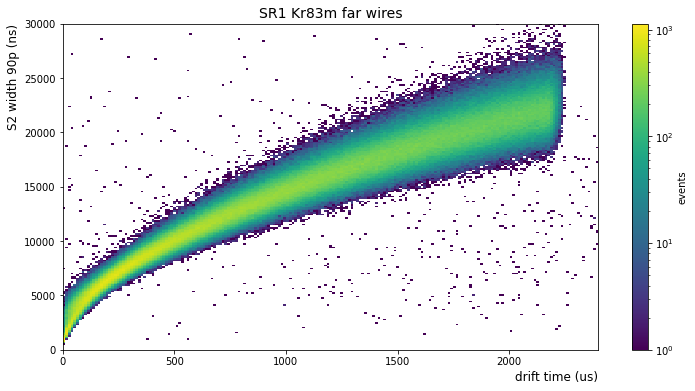

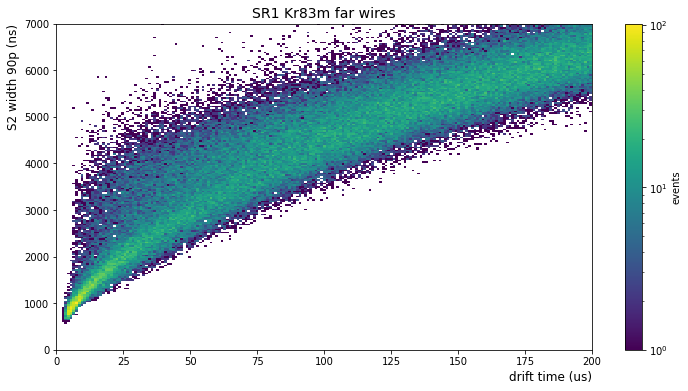

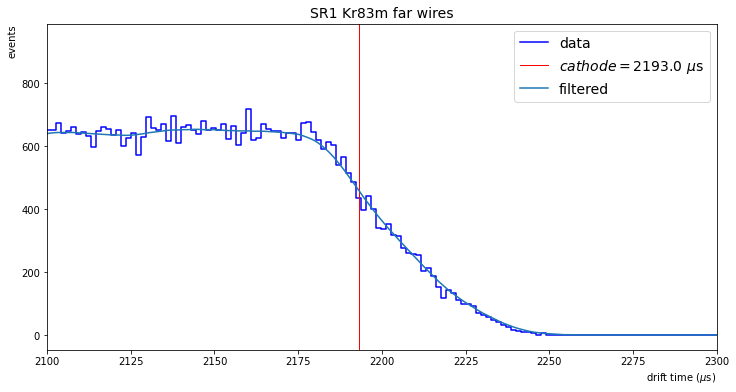

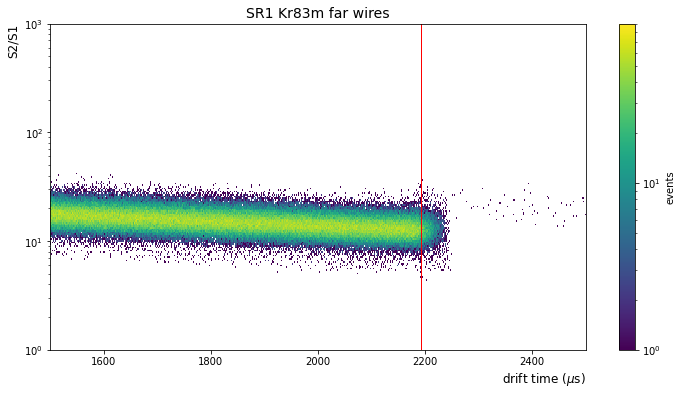

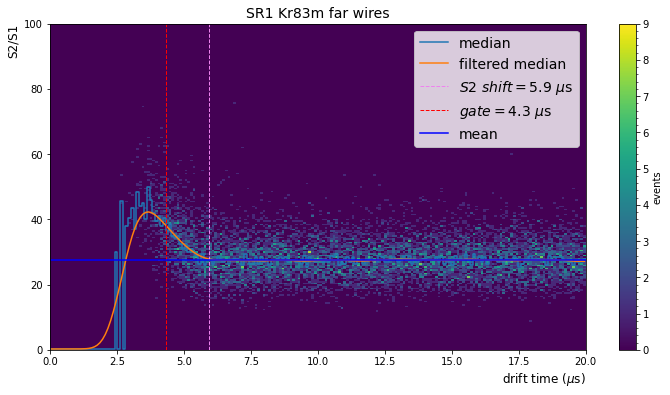

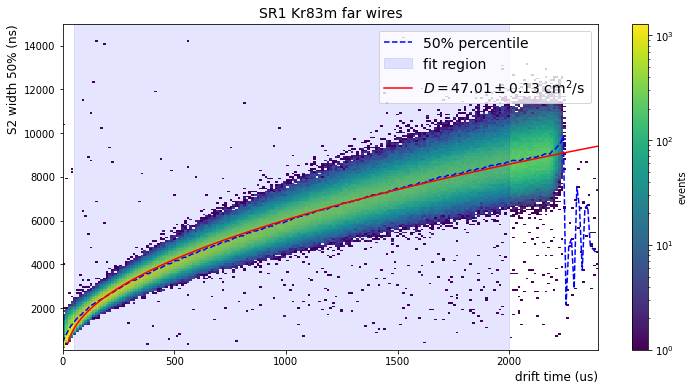

In [44]:
par=diffusion_analysis_kr(evKr0, title = 'SR1 Kr83m far wires', fit_range = (50,2000), plot = 1)

/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


total events 169366
Drift velocity = 0.677 +/- 0.003 mm/us
Diffusion constant = 52.09 +/- 0.18 cm2/s, tGate = 23.34 us


/home/valerioda/xenon-notes/fast_response_analysis/drift_diffusion_utility.py:391: RuntimeWarning: invalid value encountered in sqrt
  return sigma_to_r50p * np.sqrt(2 * D * (t-tGate) / vd**2)


(5.2090497182188053e-08, 6.772623644929514e-05, 5628.140703517588)

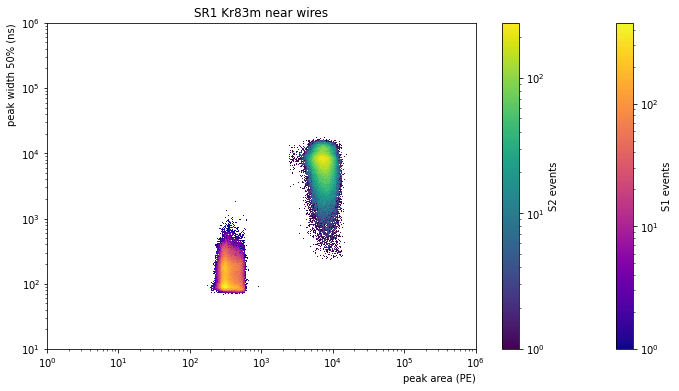

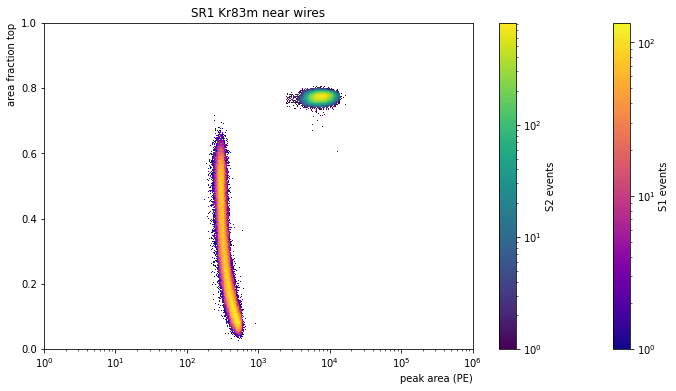

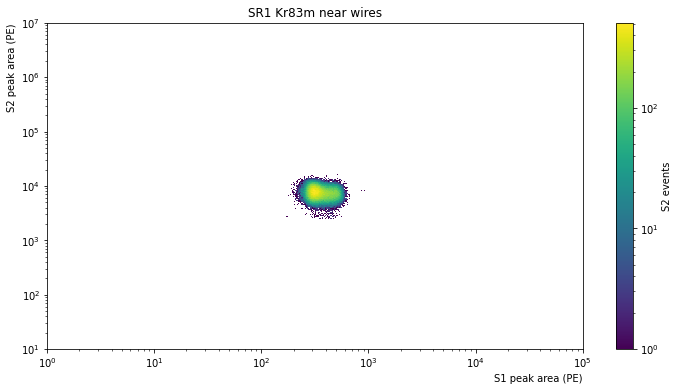

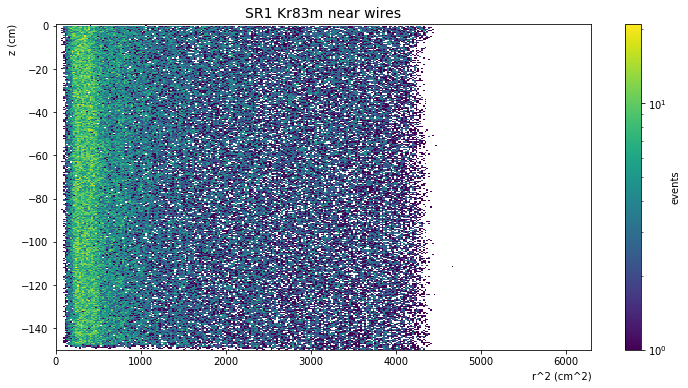

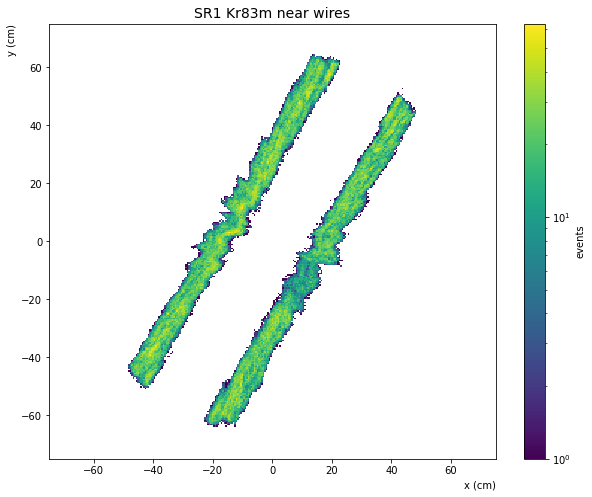

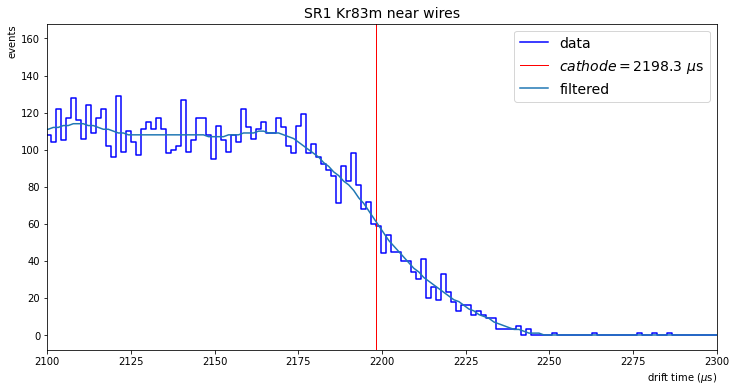

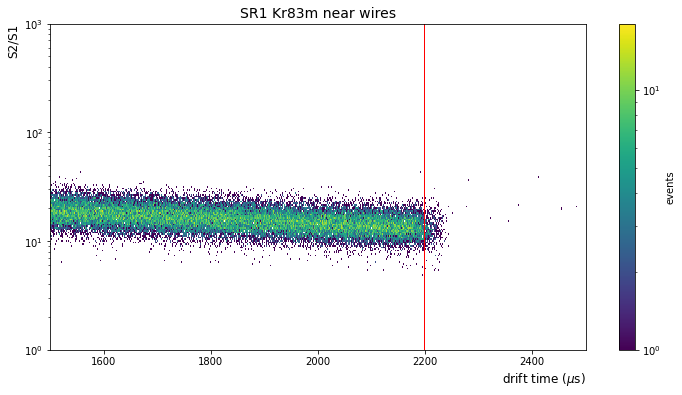

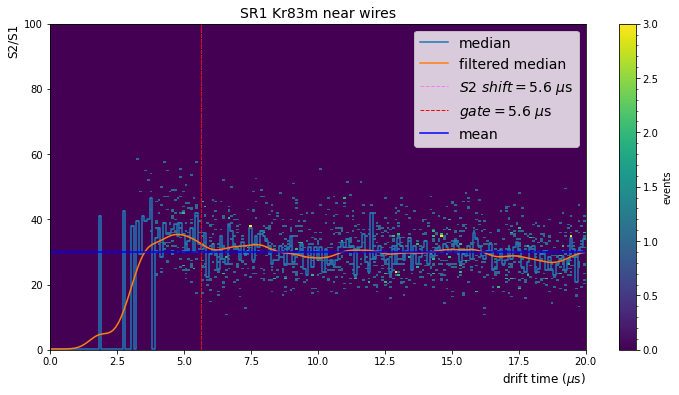

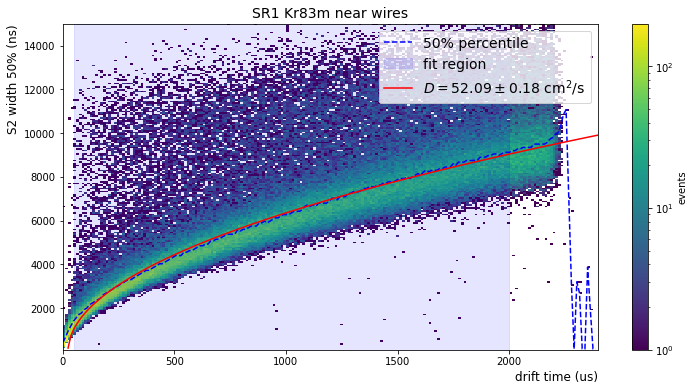

In [20]:
diffusion_analysis_kr(evKr0, title = 'SR1 Kr83m near wires', fit_range = (50,2000), plot = 1,far=0)

/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Drift velocity = 0.677 +/- 0.003 mm/us
Diffusion constant = 46.33 +/- 0.13 cm2/s, tGate = 18.34 us


/home/valerioda/xenon-notes/fast_response_analysis/drift_diffusion_utility.py:391: RuntimeWarning: invalid value encountered in sqrt
  return sigma_to_r50p * np.sqrt(2 * D * (t-tGate) / vd**2)


(4.632599242930811e-08, 6.769830922713626e-05, 4723.618090452262)

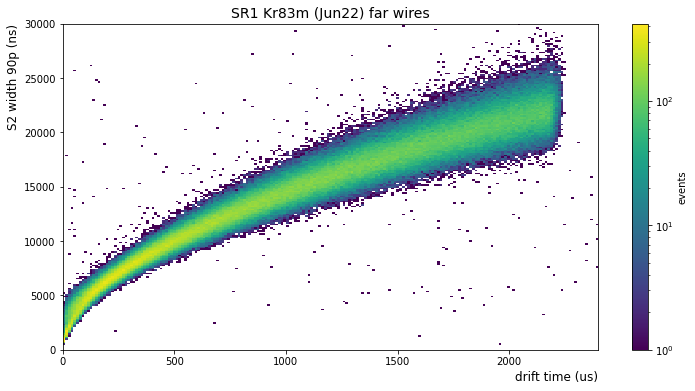

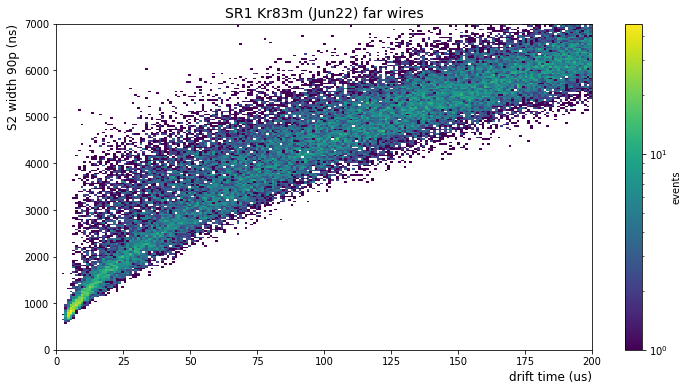

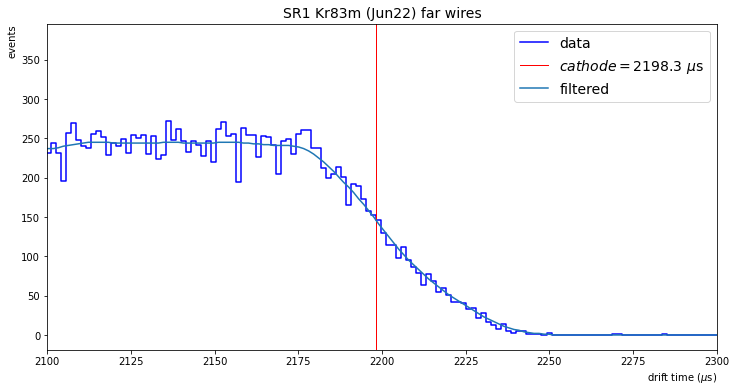

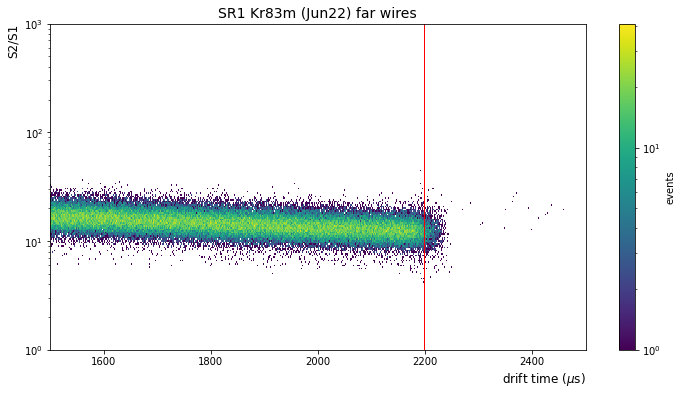

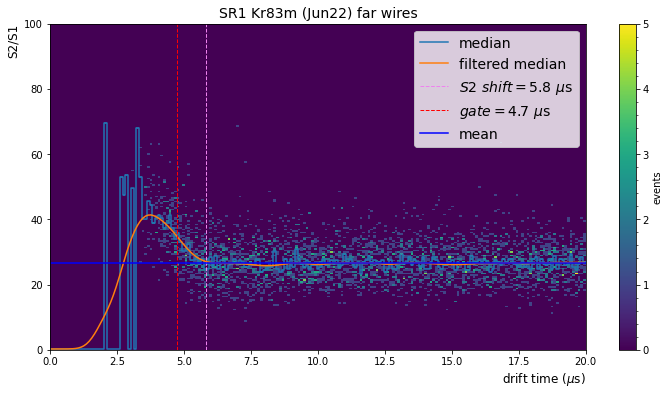

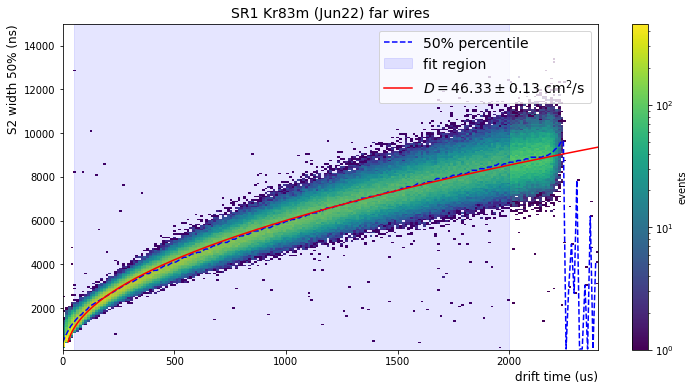

In [45]:
diffusion_analysis_kr(evKr1, title = 'SR1 Kr83m (Jun22) far wires', fit_range = (50,2000), plot = 1)

In [21]:
evKr0_ = ddu.merge_runs(st,kr_runs0[26:42])

Reading runs from 046566 to 046611
n. 4 run 046596 elapsed time: 3.01 s
n. 9 run 046581 elapsed time: 9.14 s
n. 14 run 046566 elapsed time: 16.83 s


/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Lower and higher boundary provided externally
param_parabola_low: [0.00487747 0.09634786 0.19632401]
param_parabola_high: [ 0.12086553 -1.2295208   4.37596581]
Cut: total 985623, survived 938090 -> 95.18%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


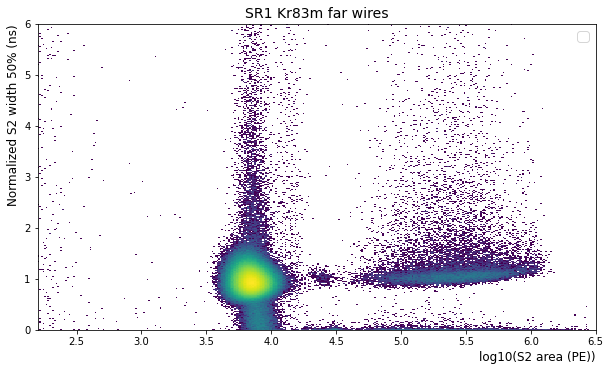

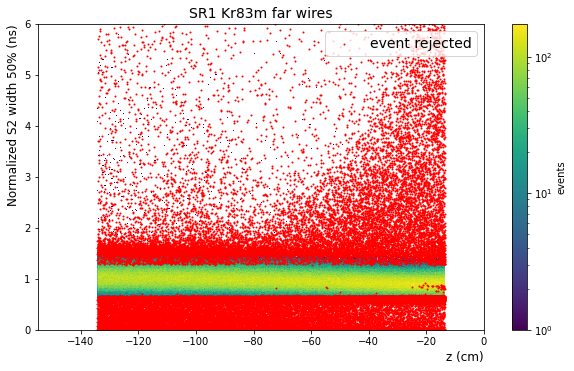

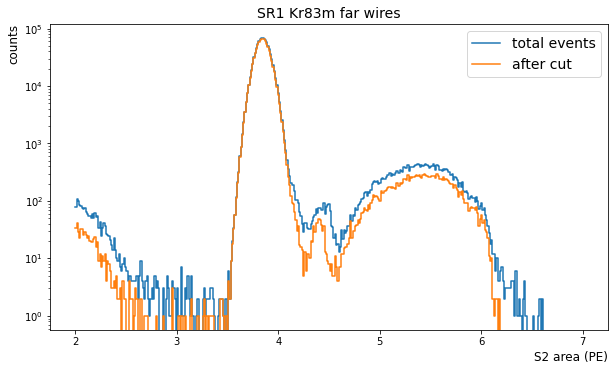

In [22]:
fit_par = (( 0.75785949,3.18263529,1.26349891), ( 4.74467848,1.34106577,1.99650474,1.02559667 ))
maskFW, maskNW = wcu.mask_S2Width_vs_pos(evKr0_)
maskFV = ddu.mask_FV(evKr0_)
#mask = (evKr0_['drift_time']<500000) & (evKr0_['s2_range_50p_area']>5000)
cut_ = wcu.S2WidthCut(evKr0_[maskFW & maskFV], title='SR1 Kr83m far wires', mod_par=par, bins=400,ext_par=fit_par,
                      wrange=(0,6), arange = (2.2,6.5), plot = 1, perc_plot=0)

# BACKGROUND STUDY

In [11]:
dsets = st.select_runs(run_mode='background_linked',available='event_info',
                       exclude_tags=('bad','messy','hot_spot','ramp_up'))

In [12]:
dsets0 = dsets[(dsets.end > pd.to_datetime('07/25/2022')) & (dsets.end < pd.to_datetime('08/07/2022'))]
dsets1 = dsets[(dsets.end > pd.to_datetime('05/01/2022')) & (dsets.end < pd.to_datetime('07/01/2022'))]

In [13]:
bkg_runs0 = dsets0.name.values[:]
bkg_runs1 = dsets1.name.values[:]
print(len(bkg_runs0), len(bkg_runs1))

101 780


In [14]:
ddir = '/dali/lgrandi/dandrea/data'
#evbkg0 = ddu.merge_runs(st,bkg_runs0[:])
#evbkg0.to_pickle(f'{ddir}/SR0_bkg_{bkg_runs0[0]}_{bkg_runs0[-1]}_EventInfo.pkl')
evbkg0 = pd.read_pickle(f'{ddir}/SR0_bkg_{bkg_runs0[0]}_{bkg_runs0[-1]}_EventInfo.pkl')

In [18]:
evbkg1 = ddu.merge_runs(st,bkg_runs1[:500])
evbkg1.to_pickle(f'{ddir}/SR0_bkg_{bkg_runs1[0]}_{bkg_runs1[500]}_EventInfo.pkl')
#evbkg1 = pd.read_pickle(f'{ddir}/SR0_bkg_{bkg_runs1[0]}_{bkg_runs1[3000]}_EventInfo.pkl')

Reading runs from 044317 to 045329
n. 4 run 045324 elapsed time: 0.79 s
n. 9 run 045319 elapsed time: 1.81 s
n. 14 run 045314 elapsed time: 2.88 s
n. 19 run 045309 elapsed time: 3.93 s
n. 24 run 045304 elapsed time: 5.05 s
n. 29 run 045299 elapsed time: 6.22 s
n. 34 run 045294 elapsed time: 7.45 s
n. 39 run 045289 elapsed time: 8.69 s
n. 44 run 045284 elapsed time: 10.06 s
n. 49 run 045279 elapsed time: 11.52 s
n. 54 run 045274 elapsed time: 13.05 s
n. 59 run 045269 elapsed time: 14.56 s
n. 64 run 045264 elapsed time: 16.11 s
n. 69 run 045259 elapsed time: 17.71 s
n. 74 run 045254 elapsed time: 19.36 s
n. 79 run 045249 elapsed time: 21.04 s
n. 84 run 045244 elapsed time: 22.76 s
n. 89 run 045239 elapsed time: 24.52 s
n. 94 run 045234 elapsed time: 26.46 s
n. 99 run 045229 elapsed time: 28.50 s
n. 104 run 045224 elapsed time: 30.62 s
n. 109 run 045217 elapsed time: 32.81 s
n. 114 run 045212 elapsed time: 35.06 s
n. 119 run 045207 elapsed time: 37.35 s
n. 124 run 045202 elapsed time: 39.

/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


total events 369821
Lower and higher boundary provided externally
param_parabola_low: [0.00487747 0.09634786 0.19632401]
param_parabola_high: [ 0.12086553 -1.2295208   4.37596581]
Cut: total 369821, survived 247819 -> 67.01%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


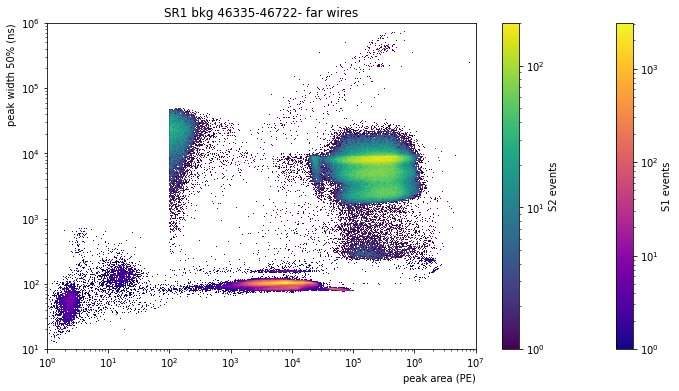

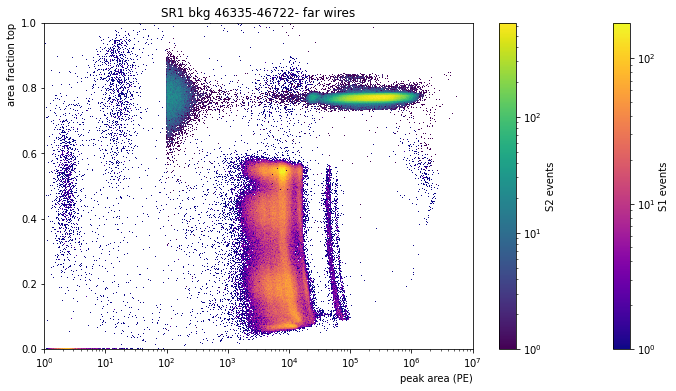

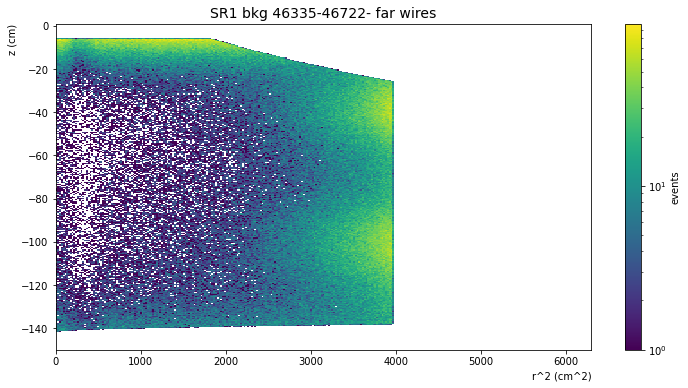

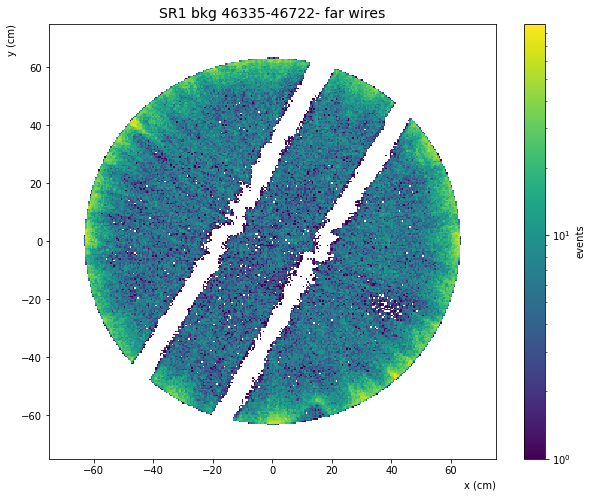

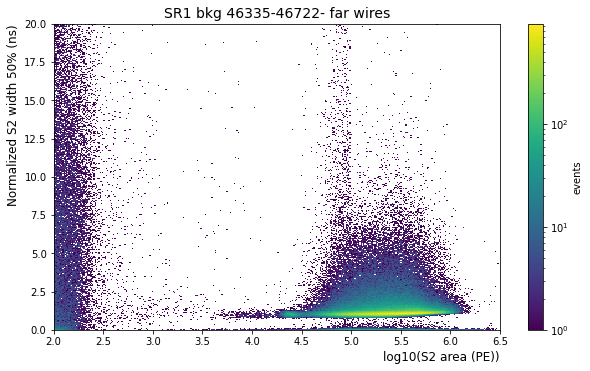

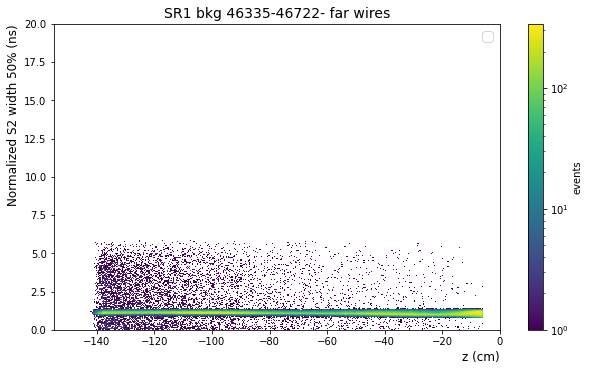

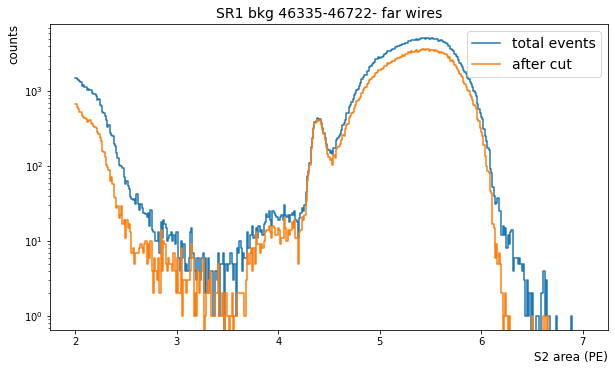

In [22]:
fit_par = (( 0.75785949,3.18263529,1.26349891), ( 4.74467848,1.34106577,1.99650474,1.02559667 ))
maskFW, maskNW = wcu.mask_S2Width_vs_pos(evbkg0)
#maskFV = ddu.mask_FV(evbkg0)
FiducialVolume = st.get_single_plugin('030000', 'cut_fiducial_volume')
maskFV = FiducialVolume.cut_by(evbkg0)
evv0 = evbkg0[maskFW & maskFV]
title='SR1 bkg 46335-46722 far wires'
ddu.plot_area_width_aft(evv0, title)
wcu.plot_r2z_xy(evv0,title)
cut_ = wcu.S2WidthCut(evv0, title=title, mod_par=par, bins=400,ext_par=fit_par,
                      wrange=(0,20), arange = (2.,6.5), plot = 1, perc_plot=0)

/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


total events 338926
Lower and higher boundary provided externally
param_parabola_low: [0.00487747 0.09634786 0.19632401]
param_parabola_high: [ 0.12086553 -1.2295208   4.37596581]
Cut: total 338926, survived 239575 -> 70.69%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


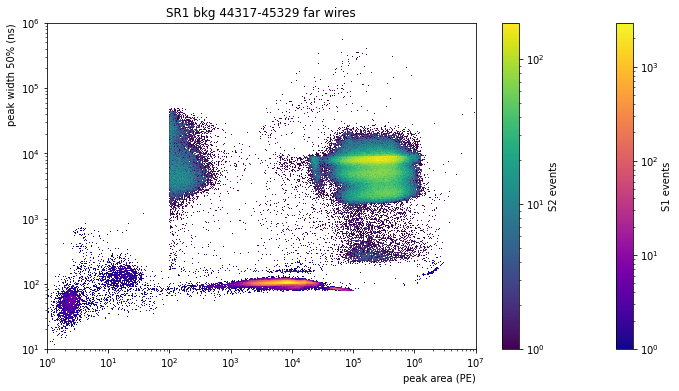

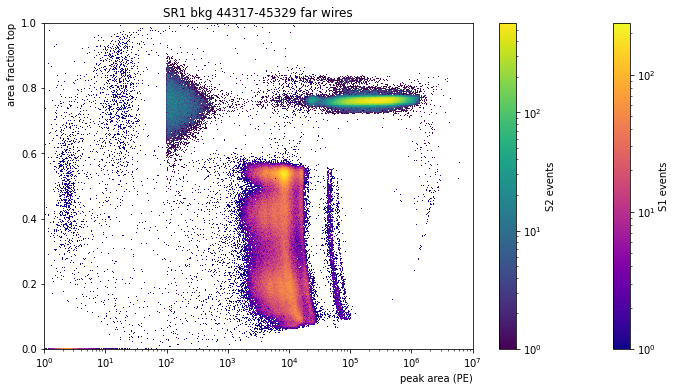

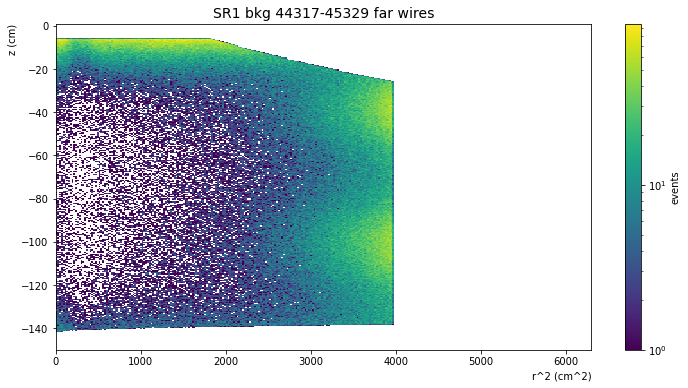

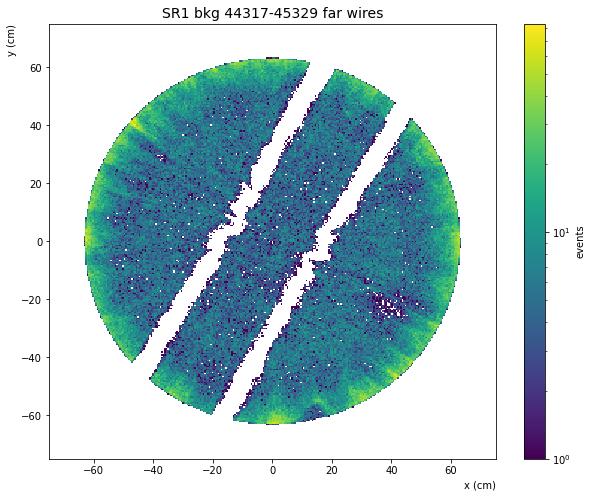

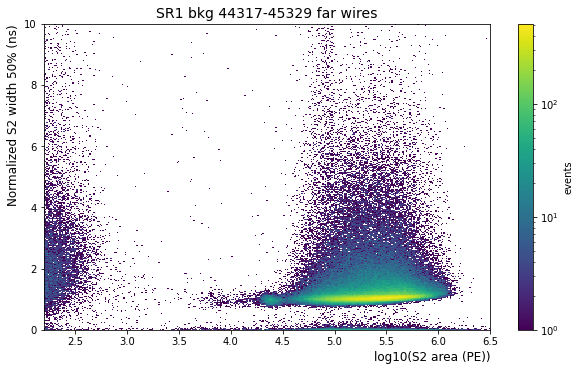

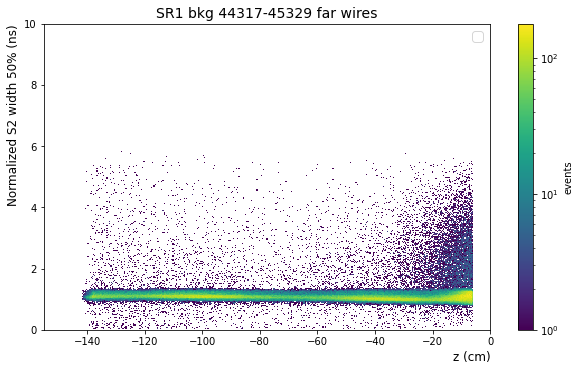

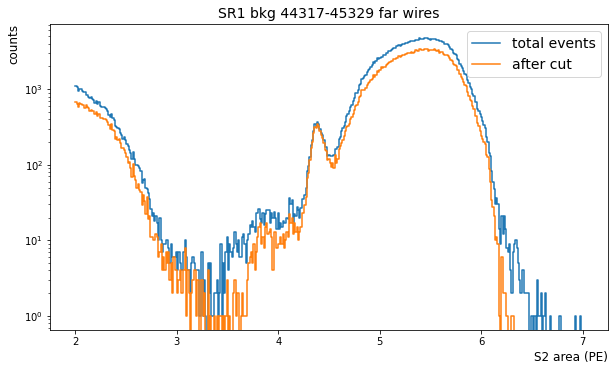

In [20]:
maskFW, maskNW = wcu.mask_S2Width_vs_pos(evbkg1)
maskFV = FiducialVolume.cut_by(evbkg1)
evv1 = evbkg1[maskFW & maskFV]
title='SR1 bkg 44317-45329 far wires'
ddu.plot_area_width_aft(evv1, title)
wcu.plot_r2z_xy(evv1,title)
cut_ = wcu.S2WidthCut(evv1, title=title, mod_par=par, bins=400,ext_par=fit_par,
                      wrange=(0,10), arange = (2.2,6.5), plot = 1, perc_plot=0)

In [36]:
import bokeh.plotting as bklt
from IPython.core.display import display, HTML
def display_events(st,run_id, nev = 1, area_cut=(1e2,1e7)):
    if (st.is_stored(run_id, ('event_info'))==False): return print('No events stored')
    ev0 = st.get_array(run_id,['event_info', 'cut_fiducial_volume'],progress_bar=False)
    maskFW, maskNW = wcu.mask_S2Width_vs_pos(ev0)
    mask = (ev0['s2_area'] > area_cut[0]) & (ev0['s2_area'] < area_cut[1])
    ev = ev0[maskFW & ev0['cut_fiducial_volume']]
    events = ev0[mask & maskFW & ev0['cut_fiducial_volume']]
    print('total events',len(ev0),'\nafter FV & far wires',len(ev),'\nafter area selection',len(events))
    for i in range(nev):
        idx = int(np.random.rand()*len(events))
        fig = st.event_display_interactive(run_id,
                                           time_range=(events[idx]['time'],
                                                       events[idx]['endtime']),
                                           bottom_pmt_array=False)
        bklt.show(fig)

/tmp/jobs/21986510/ipykernel_2671/2738366215.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [39]:
display_events(st,'046722', nev = 10, area_cut=(0,1e3))

total events 60065 
after FV & far wires 8708 
after area selection 784


/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.8/site-packages/straxen/analyses/bokeh_waveform_plot.py:562: RuntimeWarning: divide by zero encountered in log10
  area_plot = np.log10(area_per_channel)
